# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


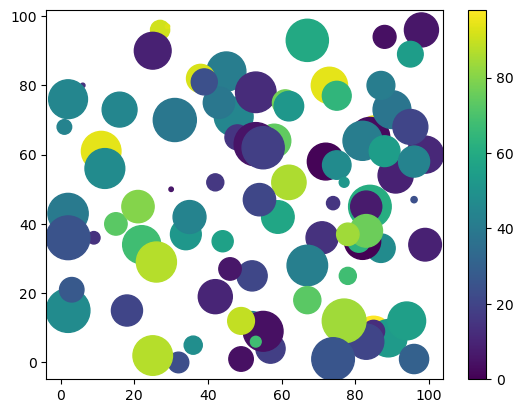

In [7]:
x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))

colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.scatter(x, y, c=colors, s=sizes)

plt.colorbar()

plt.show()


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


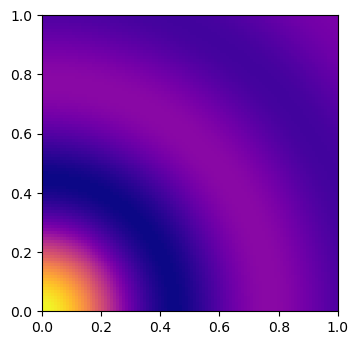

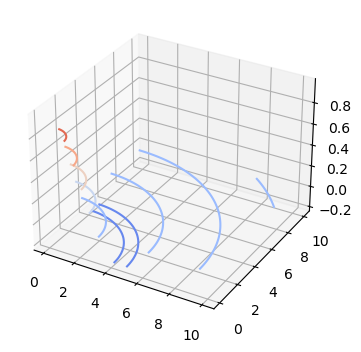

In [97]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 10, 100)
y = np.linspace(0.1, 10, 100)
X, Y = np.meshgrid(x, y)

Z = (np.sin(np.sqrt((X**2) + (Y**2)))) / (np.sqrt((X**2) + (Y**2)))
Z = Z.T

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(Z, cmap="plasma", interpolation='nearest', origin='lower', extent=[0, 1, 0, 1])


ax = plt.figure().add_subplot(projection='3d')
ax.contour(X, Y, Z, cmap=cm.coolwarm)
plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


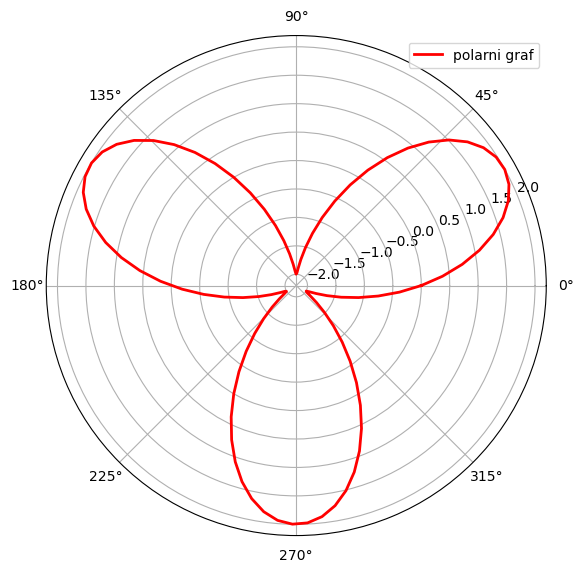

In [77]:
theta = np.linspace(0, 2 * math.pi, 100)

r = 2 * np.sin(3 * theta) 


fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0.0, 0.0, 1, 1], polar=True)

#Plot function
ax.plot(theta, r, color='red', lw=2, label="polarni graf")
ax.legend(loc=0)




4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


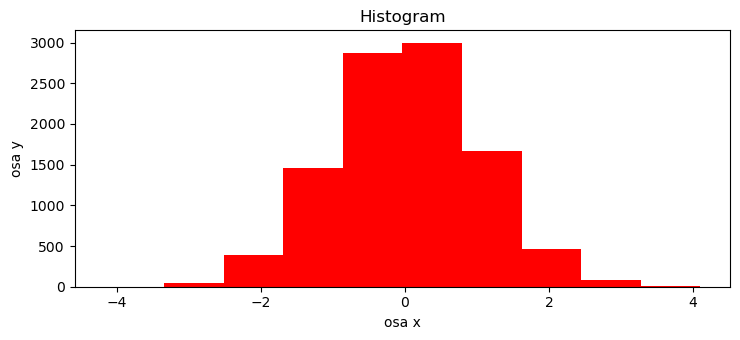

In [78]:
n = np.random.randn(10000)     
plt.hist(n, 10, color='red')   


plt.hist(n, 10, color='red')


plt.xlabel('osa x')
plt.ylabel('osa y')
plt.title('Histogram')

plt.show()
             


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


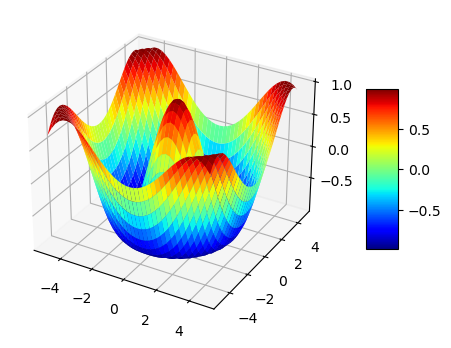

In [84]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.cos(np.sqrt(X**2 + Y**2))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=True)

fig.colorbar(surf, shrink=0.5, aspect=5)



plt.show()

# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`. 
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?

In [109]:
def integer_spiral_numpy(n):
    B = np.zeros((n + 2, n + 2))
    pp=n//2
    x = n//2 + 1  # počáteční pozice: střed matice
    y = n//2 + 1
    B[x, y] = 1 
    
    for item in range(0,pp):
        vzor=(2*item+1)*(2*item+1)
        nas=2*item +2
    
        B[x-item-1 , y-item-1:y+item+1] = np.arange(vzor +1, vzor + nas +1)[::-1]
        B[x-item:x+item+2 , y-item-1] = np.arange(vzor + nas +1, vzor + 2*nas +1)
        B[x+item+1 , y-item:y+item+2] = np.arange(vzor +2*nas +1, vzor + 3*nas +1)
        B[x-item-1:x+item+1 , y+item+1] = np.arange(vzor + 3*nas +1, vzor + 4*nas +1)[::-1]

    return B[1:-1, 1:-1]

def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))
    

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo
    
    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

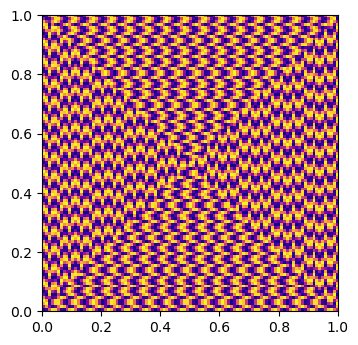

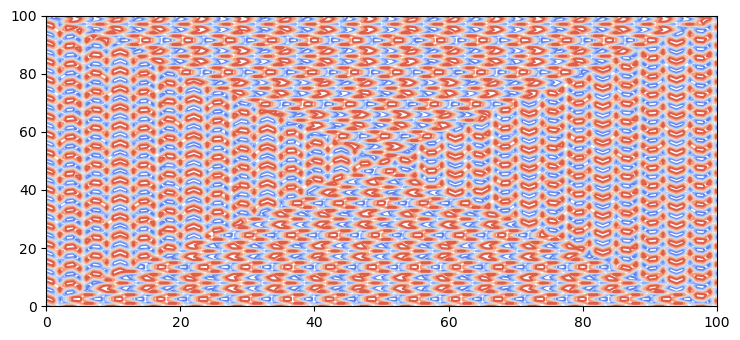

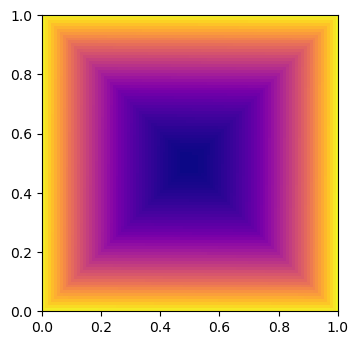

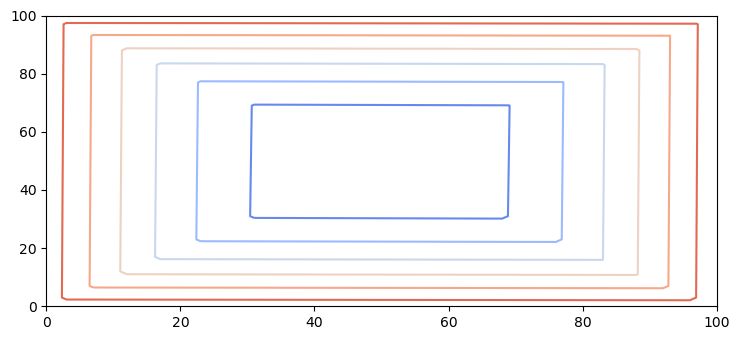

In [110]:
Z1=integer_spiral(101)
Z = np.sin(integer_spiral(101))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(Z, cmap="plasma", interpolation='nearest', origin='lower', extent=[0, 1, 0, 1])

fig, ax = plt.subplots()
ax.contour(Z, cmap=cm.coolwarm)
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(Z1, cmap="plasma", interpolation='nearest', origin='lower', extent=[0, 1, 0, 1])

fig, ax = plt.subplots()
ax.contour(Z1, cmap=cm.coolwarm)
plt.show()

In [121]:
import time
t_1 = np.zeros(20)
t_2 = np.zeros(20)

for i in range (20):
    n=11+50*i
    st = time.time()
    pl= integer_spiral_numpy(n)
    
    t_1[i] = time.time() - st


t_2 = np.zeros(20)

for i in range (20):
    n=11+50*i
    st = time.time()
    pl= integer_spiral(n)
    
    t_2[i] = time.time() - st

print(t_1)
print(t_2)

[0.00099802 0.00099993 0.00099754 0.00201964 0.00198221 0.00300074
 0.00299931 0.00600743 0.00499654 0.0080018  0.00650787 0.00703144
 0.00897527 0.01199865 0.01519084 0.01566243 0.01876259 0.02257252
 0.02148223 0.03086162]
[0.00201225 0.00699782 0.02722216 0.05095744 0.08571911 0.15525126
 0.19695616 0.27084875 0.43024683 0.45089555 0.57305908 0.78276443
 0.79149175 1.11031103 1.18047476 1.31536341 1.49238491 1.47093534
 1.6672647  1.86414027]


[0.00099802 0.00099993 0.00099754 0.00201964 0.00198221 0.00300074
 0.00299931 0.00600743 0.00499654 0.0080018  0.00650787 0.00703144
 0.00897527 0.01199865 0.01519084 0.01566243 0.01876259 0.02257252
 0.02148223 0.03086162]
[ 11  61 111 161 211 261 311 361 411 461 511 561 611 661 711 761 811 861
 911 961]


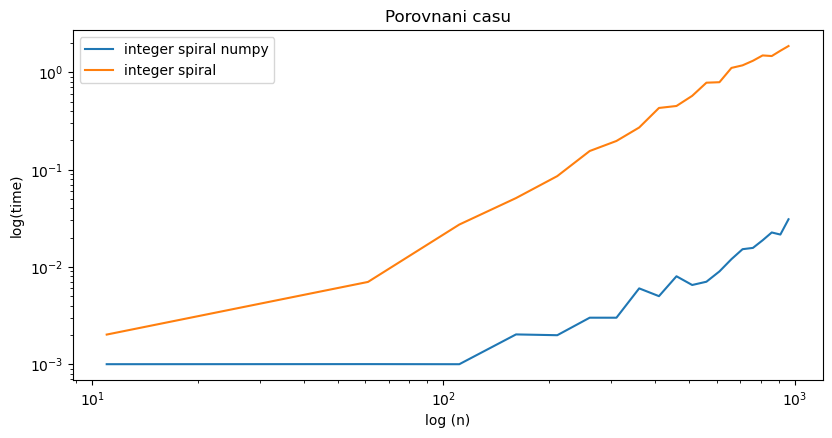

In [138]:
x = np.arange(11, 1011, 50)
y = t_1
y1= t_2
print(y)
print(x)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.loglog(x, y)
ax.loglog(x, y1)
ax.legend(labels=('integer spiral numpy', 'integer spiral'), loc='best')
plt.xlabel('log (n)')
plt.ylabel('log(time)')
title_text = ax.set_title('Porovnani casu') 

plt.show()

In [153]:
a0=np.log10(y)/np.log10(x)

# 

a1=np.log10(y1)/np.log10(x)

# rust obou funkci je linearni, pricemz casova narocnost funkce integer, se zvysujicim se poctem pokusu, je priblizne 60 krat vetsi nez integer numpy
# casova narocnost obou funkci je linearni


# f(x) se rovna x**a - prvni funkce numpy
print(a0)

# f(x) se rovna x**a - druha funkce
print(a1)

# rozdil obou exponentu je a2
a2=a0-a1
print(10**a2)

fx4=x**a0
fx5=x**a1

print(fx5/fx4)

[-2.88158417 -1.6803794  -1.46728329 -1.22108647 -1.16287497 -1.04391703
 -1.01212266 -0.86854538 -0.88043996 -0.78717999 -0.80731946 -0.78318835
 -0.73471727 -0.68111003 -0.6376232  -0.6264838  -0.59356991 -0.56096022
 -0.56357841 -0.50644366]
[-2.58914576 -1.2070806  -0.76519821 -0.58581531 -0.459033   -0.3347477
 -0.28307191 -0.22180706 -0.14013179 -0.12986595 -0.08927734 -0.0386942
 -0.03645086  0.01611397  0.02526648  0.04131547  0.05977298  0.05710167
  0.07501374  0.09068175]
[0.50998992 0.33628012 0.19857059 0.23159482 0.19776892 0.19535776
 0.18661616 0.22555979 0.18184101 0.22013341 0.19140703 0.18009674
 0.20032428 0.20080568 0.21732532 0.21488234 0.22215552 0.2409562
 0.2298306  0.25285677]
[  2.01624462   6.99833095  27.28919694  25.23090544  43.24416647
  51.73772446  65.6672496   45.08560543  86.10898506  56.34923425
  88.05627198 111.32347755  88.18586798  92.5363033   77.70964451
  83.9820681   79.54045949  65.16487811  77.61134479  60.40319677]


# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.